
## Decision Tree and Random Forest 

I will be exploring publicly available data from [LendingClub.com](https://www.lendingclub.com/). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

I will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [5]:
df = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Exploratory

I explore data by seaborn plotting 


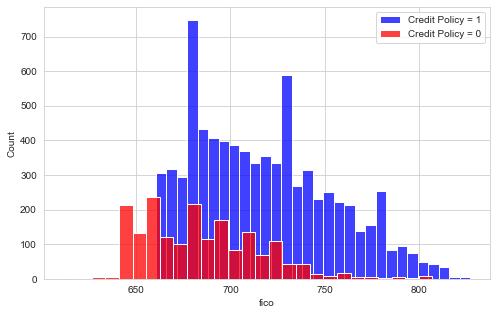

In [20]:
sns.set_style("whitegrid")
fig , ax = plt.subplots(figsize = (8,5))
sns.histplot (data = df [df ['credit.policy']==1] , x = 'fico', ax = ax, color = 'blue', \
              label = 'Credit Policy = 1')
sns.histplot (data = df [df ['credit.policy']==0] , x = 'fico', ax = ax, color = 'red', \
              label = 'Credit Policy = 0')
ax.legend()

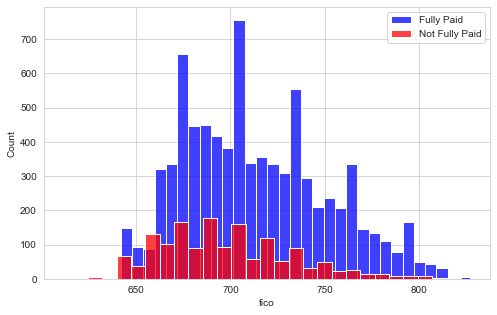

In [24]:
sns.set_style("whitegrid")
fig , ax = plt.subplots(figsize = (8,5))
sns.histplot (data = df [df ['not.fully.paid']==0] , x = 'fico', ax = ax, color = 'blue', \
              label = 'Fully Paid')
sns.histplot (data = df [df ['not.fully.paid']==1] , x = 'fico', ax = ax, color = 'red', \
              label = 'Not Fully Paid')
ax.legend()

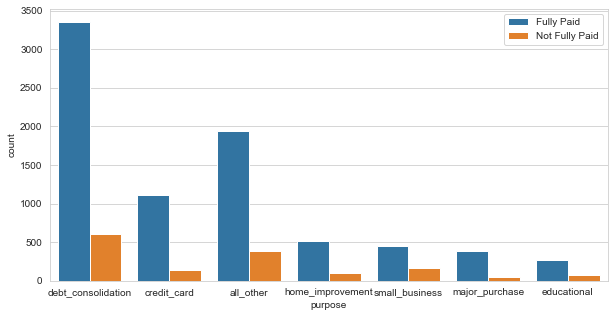

In [31]:
sns.set_style("whitegrid")
fig , ax = plt.subplots(figsize = (10,5))
sns.countplot (data = df, x = 'purpose' , hue = 'not.fully.paid')
ax.legend(['Fully Paid','Not Fully Paid'])


** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

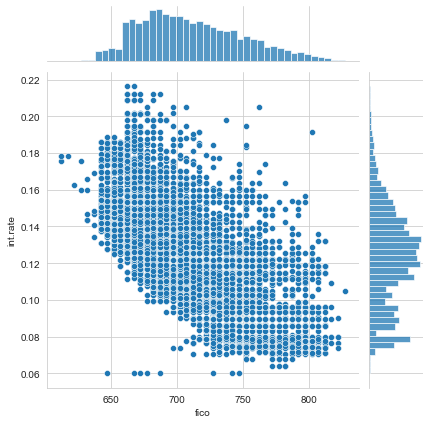

In [35]:
sns.jointplot(data = df , x = 'fico', y= 'int.rate')

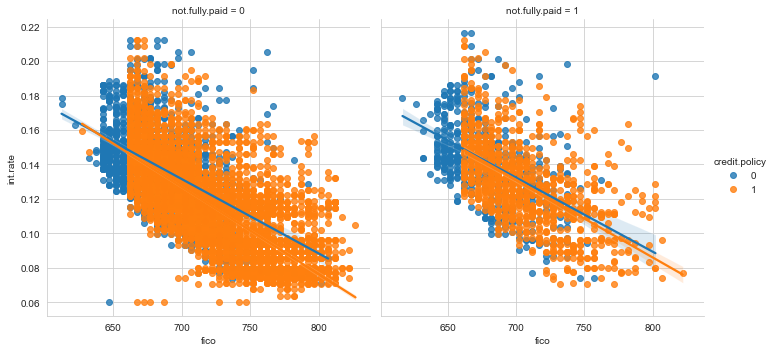

In [51]:
sns.lmplot(data = df, x = 'fico', y = 'int.rate', col='not.fully.paid', hue = 'credit.policy')

### Setting up the Data (Converting Categorical Data)

The **purpose** column is categorical and so I need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.


In [66]:
df_dummies = pd.get_dummies(df, columns=['purpose'], drop_first=True)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split


In [71]:
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop('not.fully.paid', axis = 1), df_dummies ['not.fully.paid'],\
                                                    test_size=0.4, random_state=101)

### Training a Decision Tree Model


In [83]:
tre = DecisionTreeClassifier()
tre.fit(X_train, y_train)

DecisionTreeClassifier()

### Evaluation of Decision Tree

In [84]:
prediction = tre.predict(X_test)
print(classification_report(prediction, y_test))
print('\n')
print(confusion_matrix(prediction,y_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3143
           1       0.23      0.19      0.21       689

    accuracy                           0.73      3832
   macro avg       0.53      0.52      0.52      3832
weighted avg       0.72      0.73      0.73      3832



[[2682  461]
 [ 555  134]]


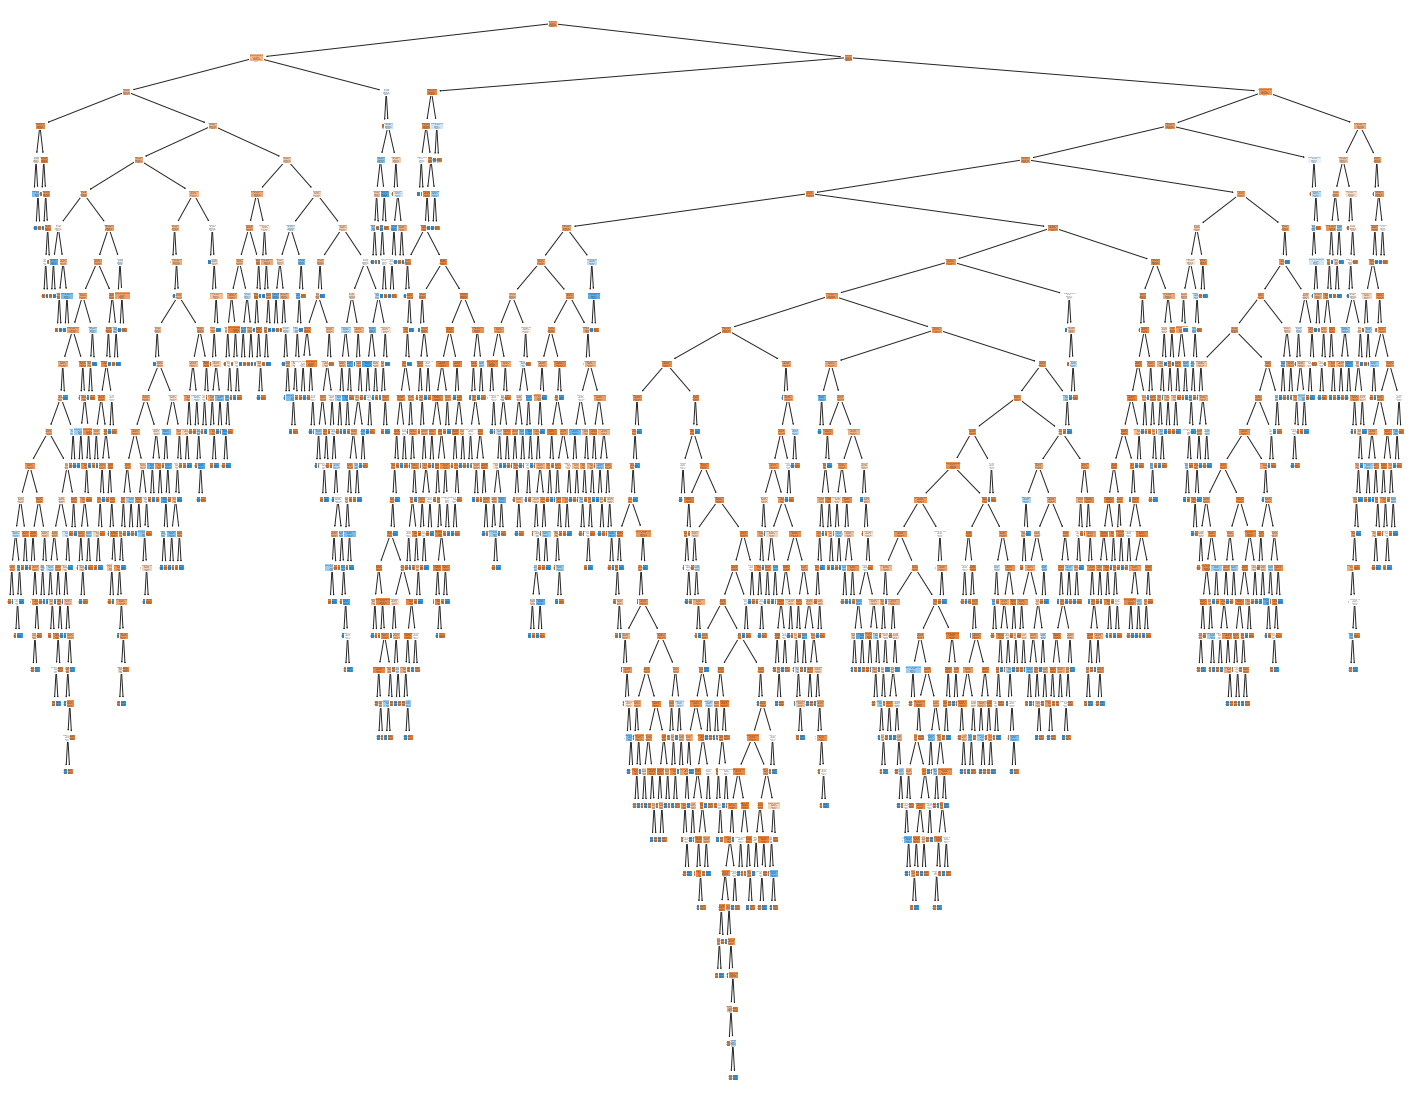

In [91]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tre, 
                   feature_names=X_train.columns,  
                   class_names='not.fully.paid',
                   filled=True)

### Training the Random Forest model


In [76]:
rfm = RandomForestClassifier(n_estimators= 200)

In [79]:
rfm.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

### Evaluation of Decision Tree

In [80]:
prediction_rfm = rfm.predict(X_test)
print(classification_report(prediction_rfm, y_test))
print('\n')
print(confusion_matrix(prediction_rfm,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3795
           1       0.04      0.62      0.07        37

    accuracy                           0.85      3832
   macro avg       0.52      0.74      0.49      3832
weighted avg       0.99      0.85      0.91      3832



[[3223  572]
 [  14   23]]
